In [208]:
import pandas as pd
import numpy as np

def person(tweets):
    first = tweets.str.count(r'I\'m| i | I |^I |^i |I am|me|my|mine|we|our|i\'m|im|i am|Im').sum()/1000
    second = tweets.str.count(r'you|y\'all| u | U |^U |^u |ur |yourself|urself|Your a|your a').sum()/1000
    third = tweets.str.count(r'he|she|they|his|her|their').sum()/1000
    not_first = second + third

    return first, second, third, not_first

def lowercaseI(tweets):
    no = tweets.str.count(r'I\'m|I am|Im|^I ').sum()
    yes = tweets.str.count(r'i\'m|i am|im|^i ').sum()
    
    return no, yes


alch = pd.read_csv('data/alcoholic.txt', sep='\t')
alch_tweets = alch['Tweet']
alch_person = person(alch_tweets)
alch_lower = lowercaseI(alch_tweets)

depressed = pd.read_csv('data/depressed.txt', sep='\t')
depressed_tweets = depressed['Tweet']
depressed_person = person(depressed_tweets)
depressed_lower = lowercaseI(depressed_tweets)

depression = pd.read_csv('data/depression.txt', sep='\t')
depression_tweets = depression['Tweet']
depression_person = person(depression_tweets)
depression_lower = lowercaseI(depression_tweets)

suicide = pd.read_csv('data/suicide.txt', sep='\t')
suicide_tweets = suicide['Tweet']
suicide_person = person(suicide_tweets)
suicide_lower = lowercaseI(suicide_tweets)

print(alch_person)
print(depressed_person)
print(depression_person)
print(suicide_person)

first_person = alch_person[0] + depressed_person[0] + depression_person[0] + suicide_person[0]
second_person = alch_person[1] + depressed_person[1] + depression_person[1] + suicide_person[1]
third_person = alch_person[2] + depressed_person[2] + depression_person[2] + suicide_person[2]


(30.253, 6.587, 14.836, 21.423000000000002)
(112.934, 17.528, 50.868, 68.396)
(54.348, 12.024, 43.973, 55.997)
(52.177, 11.615, 42.262, 53.877)


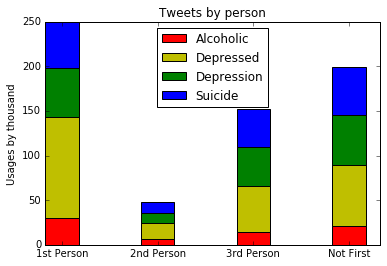

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt

N = 4
alcoholic = np.array(alch_person)
depressed = np.array(depressed_person)
depression = np.array(depression_person)
suicide = np.array(suicide_person)

width = 0.35
ind = np.arange(N)

p1 = plt.bar(ind, alcoholic, width, color='r')
p2 = plt.bar(ind, depressed, width, color='y',bottom=alcoholic)
p3 = plt.bar(ind, depression, width, color='g',bottom=alcoholic+depressed)
p4 = plt.bar(ind, suicide, width, color='b',bottom=alcoholic+depressed+depression)


plt.ylabel('Usages by thousand')
plt.title('Tweets by person')

plt.xticks(ind + width/2., ('1st Person', '2nd Person', '3rd Person', 'Not First'))
plt.legend((p1[0], p2[0], p3[0],p4[0]), ('Alcoholic', 'Depressed', 'Depression','Suicide'),loc='best')

plt.show()



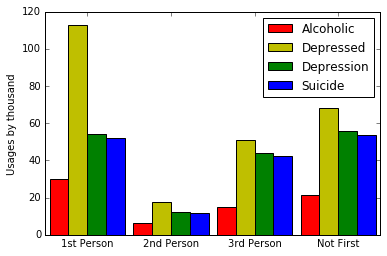

In [210]:
N = 4
groups = [np.array(alch_person),
    np.array(depressed_person),
    np.array(depression_person),
    np.array(suicide_person)]

group_labels = ["1st Person", "2nd Person","3rd Person","Not First"]
num_items = len(group_labels)
margin = 0.05
width = (1.-2.*margin)/num_items
ind = np.arange(num_items)
colors = ["r","y","g","b"]

s = plt.subplot(1,1,1)
rects = []
for num, vals in enumerate(groups):
    xdata = ind+margin+(num*width)
    rects.append(plt.bar(xdata, vals, width, color=colors[num]))

plt.ylabel('Usages by thousand')
s.set_xticks(ind+0.5)
s.set_xticklabels(group_labels)
s.legend(rects,('Alcoholic', 'Depressed', 'Depression','Suicide'),loc='best')

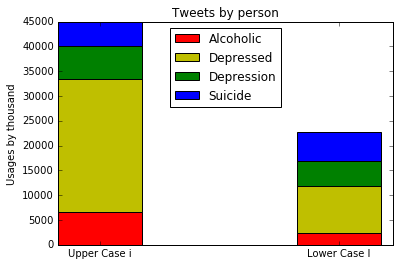

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt

N = 2
alcoholic = np.array(alch_lower)
depressed = np.array(depressed_lower)
depression = np.array(depression_lower)
suicide = np.array(suicide_lower)

width = 0.35
ind = np.arange(N)

p1 = plt.bar(ind, alcoholic, width, color='r')
p2 = plt.bar(ind, depressed, width, color='y',bottom=alcoholic)
p3 = plt.bar(ind, depression, width, color='g',bottom=alcoholic+depressed)
p4 = plt.bar(ind, suicide, width, color='b',bottom=alcoholic+depressed+depression)


plt.ylabel('Usages by thousand')
plt.title('Tweets by person')

plt.xticks(ind + width/2., ('Upper Case i', 'Lower Case I'))
plt.legend((p1[0], p2[0], p3[0],p4[0]), ('Alcoholic', 'Depressed', 'Depression','Suicide'),loc='upper center')

plt.show()

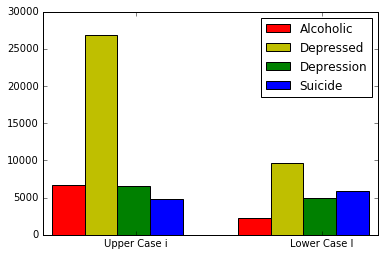

In [212]:
N = 2
groups = [np.array(alch_lower),
    np.array(depressed_lower),
    np.array(depression_lower),
    np.array(suicide_lower)]

group_labels = ["Upper Case i", "Lower Case I"]
num_items = len(group_labels)
margin = 0.05
width = (7*margin)/num_items
ind = np.arange(num_items)
colors = ["r","y","g","b"]

s = plt.subplot(1,1,1)
rects = []
for num, vals in enumerate(groups):
    xdata = ind+margin+(num*width)
    rects.append(plt.bar(xdata, vals, width, color=colors[num]))


s.set_xticks(ind+0.5)
s.set_xticklabels(group_labels)
s.legend(rects,('Alcoholic', 'Depressed', 'Depression','Suicide'),loc='best')

In [213]:
alch_tweets[alch_tweets.str.contains(r'I\'m| i | I |^I |^i | I am|me|my|mine|we|our|i\'m|im|i am|Im',na=False)]

0        Guys, this isn't easy for me to say, but I thi...
1        @Super_Manda512 For shame.  Just tell everyone...
3          @fuckboybobby: Meanwhile im an alcoholic.  Same
4          @fuckboybobby: Meanwhile im an alcoholic.  Same
6                  Yeaahh I can be an alcoholic sometimes 
8        @Rodriguez_2015 @aMexicant @AlcoholicsAnony e ...
9        @beckiidawkins it was the best thing ever, gue...
10                    I'm being an alcoholic for Halloween
11       @chrisdangg nah I just like... Moved my hand i...
12                             I am an alcoholic &gt;.&lt;
13                        Hi I'm Robert, I'm an alcoholic.
14       @natashacameron7 is this why ur an alcoholic r...
16                 Watch me become an alcoholic during HSC
17       @SundayBrunchC4 .. "You'll never see a bald al...
19       #Airport #cocktail on my own #alcoholic  @ Ams...
20       #Airport #cocktail on my own #alcoholic  @ Ams...
21             @SamTrueman93 Sam's an alcoholic without 